<a href="https://colab.research.google.com/github/miraytopal/AB_Testing/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A/B Testing Steps:**
 
*1. Understanding business problem*

*2. Understanding and preparing data*

*3. Assumption Check*
- Check Normality
- Homogeneity

*4. Implementation of the Hypothesis*
- Parametric test- if assumptions are provided
- Non-parametric test- Mann Whitney U Test if assumptions are not provided

*5. Evaluate the results*



###**1.Understanding business problem and data :**
 - Adding the trust seals to a website is a way to Gain Trust on Your Landing Pages.So we added trust seals our websites Landing Page and we want to know the impact of the new website design on sales.To do this, we have two groups, control and variant.

**Dataset Features:**

- USER_ID : User's ID number

- VARIANT_NAME : Group label (control and variant)

- REVENUE : Money spent by the relevant user


###**2.Understanding and Preparing Data**


In [1]:
# necessary libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro, levene

In [2]:
df = pd.read_csv('/content/AB_Test_Results.csv')

In [3]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [4]:
df = df.groupby(by=['USER_ID', 'VARIANT_NAME']).sum().reset_index()

In [5]:
# Summary stats
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["REVENUE"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
REVENUE,7865.0,0.126442,2.61386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.27,196.01


In [23]:
df.shape

(7864, 3)

In [24]:
# Number of Unique User
df.USER_ID.nunique()

6323

In [9]:
# A/B Groups & Summary Stats
df.groupby("VARIANT_NAME").REVENUE.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
VARIANT_NAME,,,,,
control,3931,0.0,0.163572,3.385721,196.01
variant,3934,0.0,0.089342,1.484566,58.63


#####Outliers

<AxesSubplot:xlabel='VARIANT_NAME', ylabel='REVENUE'>

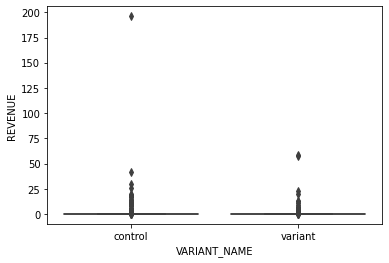

In [11]:
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=df)

In [12]:
df[df.REVENUE > 100]

,USER_ID,VARIANT_NAME,REVENUE
2663,3342,control,196.01


In [13]:
# We'll remove strong outlier
df = df[df['USER_ID'] != 3342]

<AxesSubplot:xlabel='VARIANT_NAME', ylabel='REVENUE'>

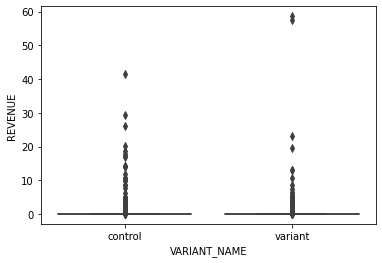

In [14]:
# new distribution
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=df)

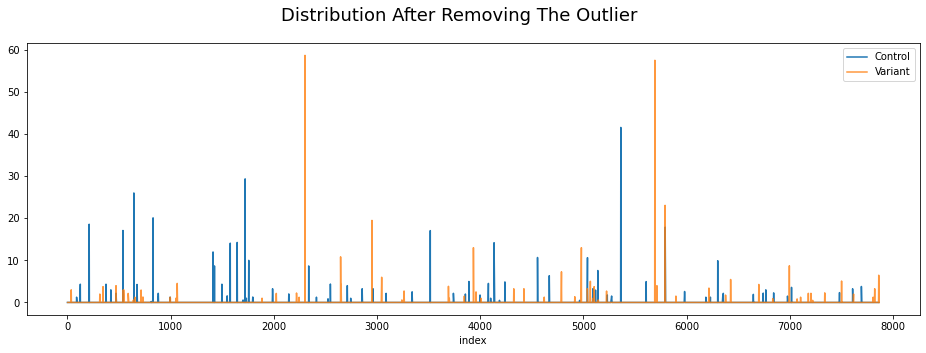

In [28]:
df[(df.VARIANT_NAME == 'control')].reset_index().set_index('index').REVENUE.plot(legend = True, label = 'Control', figsize = (16,5))
df[df.VARIANT_NAME == 'variant'].reset_index().set_index('index').REVENUE.plot(legend = True, label = 'Variant', alpha = 0.8)
plt.suptitle('Distribution After Removing The Outlier', fontsize = 18);

In [16]:
# final means of the groups
df.groupby('VARIANT_NAME').agg({'REVENUE':'mean'})

,REVENUE
VARIANT_NAME,
control,0.113738
variant,0.089342


###**3.Assumption Check**
- Normality Assumption
- Variance Homogeneity

#####Normality Assumption

- H0 : There is no statistically significant difference between the sample distribution and the normal distribution.

- H1 : There is a statistically significant difference between the sample distribution and the normal distribution

In [18]:
test_stat, pvalue = shapiro(df.loc[df['VARIANT_NAME']=='control', 'REVENUE'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0613, p-value = 0.0000


In [19]:
test_stat, pvalue = shapiro(df.loc[df['VARIANT_NAME']=='variant', 'REVENUE'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0328, p-value = 0.0000


p-value < 0.05, We reject the H0 and it explains that the data are non-normal distribution for both groups. We'll continue with the Mann-Whitney U test, which is a Non-Parametric Method.

###**4.Implementation of the Hypothesis**
- Parametric test- if assumptions are provided
- Non-parametric test- Mann Whitney U Test if assumptions are not provided

######Non-parametric test - Mann Whitney U Test
- H0: The distribution of the values of the two groups are equal
- H1: The distribution of the values of the two groups are not equal

In [21]:
mannwhitneyu(df.loc[df.VARIANT_NAME == 'variant', 'REVENUE'], df.loc[df.VARIANT_NAME == 'control', 'REVENUE'])

MannwhitneyuResult(statistic=7714034.5, pvalue=0.4950055422278089)

p-value > 0.05 therefore H0 is not rejected.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


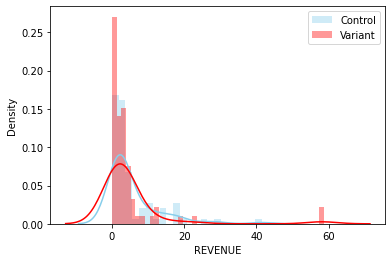

In [26]:
# Let's check distribution of the groups
sns.distplot(df_control.loc[(df_control['REVENUE'] > 0), 'REVENUE'], color="skyblue", label="Control")
sns.distplot(df_variant.loc[(df_variant['REVENUE'] > 0), 'REVENUE'], color="red", label="Variant")
plt.legend()
plt.show()

###**5.Evaluate the results**

- We removed strong outliers from the dataset. We determined that the normality assumption is not provided in the dataset using the Shapiro test. Therefore, we performed non-parametric testing and found that the p-value was bigger than 0.05, so we couldn't reject the H0 hypothesis. As a result, we cannot say that there is a difference between the two groups.

- The trust stamps added to the landing page did not produce effective results. It can be removed if desired, or its effects can be re-evaluated from different perspectives.